# 비지도 학습(Unsupevised Learning)

* *  *

## 정의

- 출력값이나 정보 없이 학습 알고리즘을 가르쳐야 하는 모든 종류의 머신러닝
- 입력 데이터만으로 데이터에서 인사이트를 추출함

## 종류
- 비지도 변환: 데이터를 새롭게 표현하여 사람이나 다른 머신러닝 알고리즘이 원래 데이터보다 쉽게 해석할 수 있도록 만드는 알고리즘
    - 차원 축소: 특성이 많은 고차원 데이터를 특성의 수를 줄이면서 꼭 필요한 특징을 포함한 데이터로 표현하는 방법
    - 데이터를 구성하는 단위나 성분을 찾기도 함
- 군집: 데이터를 비슷한 것끼리 묶는 것

## 비지도 학습의 실질적 사용처
- 비지도 학습의 타겟값이 없다는 특성 때문에 뭔가 유용한 것을 학습했는지 평가하기 어려움
- 이러한 이유로 EDA나 전처리 단계에서 사용되는 경우가 많음

## 차원 축소, 특성 추출, 매니폴드 학습
- 비지도 학습을 사용해 데이터를 변환하는 이유
    - 시각화, 데이터 압축, 추가적인 처리르 위해 정보가 잘 드러나는 표현을 찾기 위해서!
    - 이를 위해 PCA, CMF, t-SNE를 주로 사용함

### 주성분 분석(Principal Component Analysis, PCA)
- 특성들이 통계적으로 상관관계가 없도록 데이터셋을 회전시키는 기술로,
- 회전한 뒤에 데이터를 설명하는 데 얼마나 중요하냐에 따라 특성 중 일부만 선택함
- 주로 특성 파악이 어려운 고차원 데이터셋에 사용함!
- 또한, 데이터에서 노이즈를 제거하거나 주성분에서 유지되는 정보를 시각화 하는 데 유용하게 사용됨!

#### 주성분 분석의 과정
- 2차원의 데이터셋을 가정하여 설명한다.

    1. 분산이 가장 큰 방향을 찾는다. (분산이 가장 큰 방향이라 함은 데이터에서 가장 많은 정보를 담고 있다는 뜻으로 특성들의 상관관계가 가장 큰 방향을 의미)
    2. 찾은 첫 번째 방향과 수직 관계인 나머지 방향들 중에서 가장 많은 정보를 담고 있는 방향을 찾는다. (이렇게 찾은 방향들을 주성분이라고 하며, 원본 데이터의 특성 개수만큼 존재함)
    3. 주성분을 찾았다면, 각 축에 나란히 되도록 회전시키고, 중심을 원점에 맞출 수 있도록 평균을 빼준다.
    4. 만약 첫 번째 주성분만 남기려고 한다면, 두 번째 주성분을 제거시킨다. (이떄, 단순히 원본 데이터의 특성 중 첫 번째 특성을 남기는 것이 아니라 주성분을 남기는 것임)
    5. 다시 원래의 형태로 만들기 위해 평균을 더하고 반대로 회전시키면 된다. (그럼 원래의 특성 공간에 놓여 있지만, 첫 번째 주성분의 정보만 담고 있음)

#### 주성분 분석 실습

In [2]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

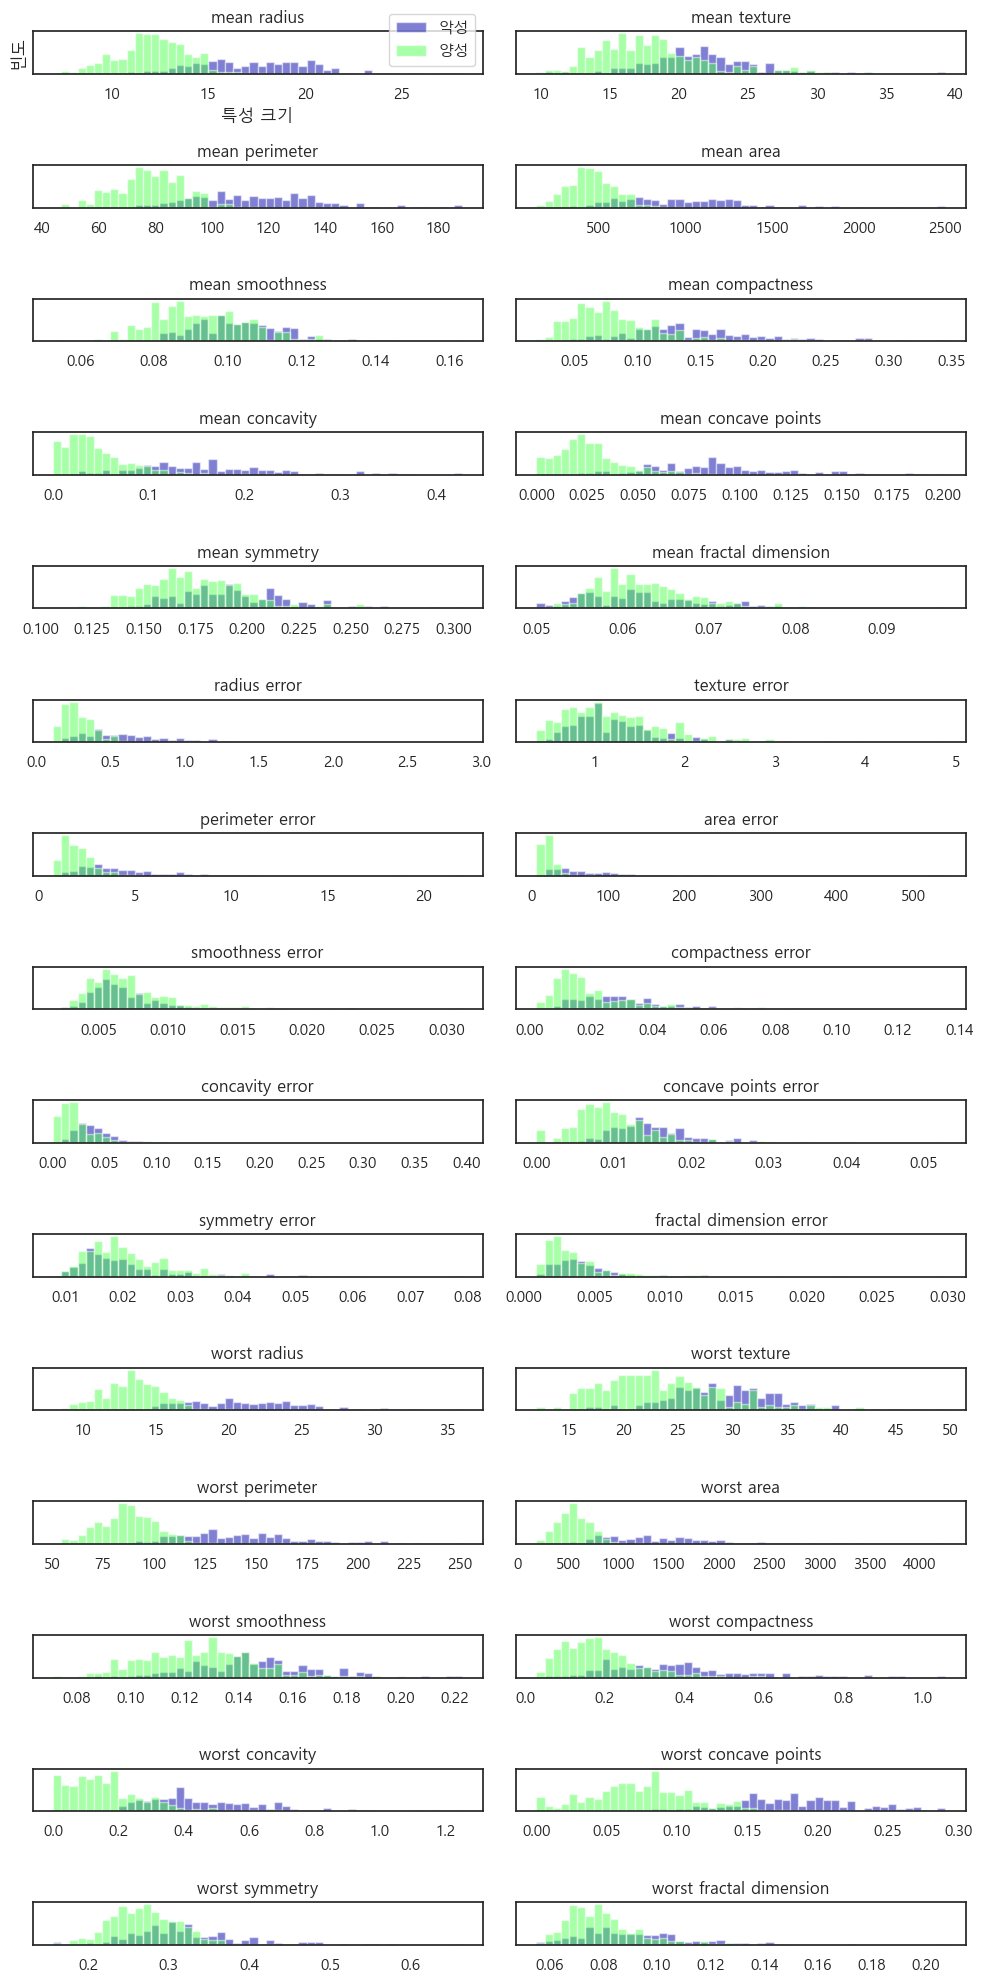

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import mglearn

plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='white')

fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50) # 첫 번째 반환값은 인덱스이므로 시각화에 필요가 없어서 버림(_로 표시), 두 번째 값은 구간값
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=0.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=0.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(()) # y축의 눈금 제거
ax[0].set_xlabel("특성 크기")
ax[0].set_ylabel("빈도")
ax[0].legend(["악성", "양성"], loc="best")
fig.tight_layout()

- 특성 별 타겟값의 분포를 히스토그램을 통해 살펴봤다.
- 이를 통해 어떤 특성이 양성과 악성 샘플을 구분하는 데 더 좋은지 가능해볼 수 있다.
- 그러나 이 그래프는 특성 간의 상호작용이나 이 상호작용이 타겟값과 어떤 관련이 있는지는 전혀 알려주지 못한다.
- 이때, PCA를 사용하면 주요 상호작용을 찾아낼 수 있어 데이터를 더 자세하게 탐색이 가능하다!

In [5]:
# PCA를 적용하기 전에 StandardScaler를 사용하여 각 특성의 분산이 1이 되도록 스케일링 함
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

cancer = load_breast_cancer()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(cancer['data'])

In [6]:
from sklearn.decomposition import PCA
# 데이터의 처음 두 개 주성분만 유지
pca = PCA(n_components=2)

# 처음 두 개의 주성분을 사용해 데이터를 변환
X_pca = pca.fit_transform(X_scaled)
print(f"원본 데이터의 형태: {X_scaled.shape}")
print(f"축소된 데이터의 형태: {X_pca.shape}")

원본 데이터의 형태: (569, 30)
축소된 데이터의 형태: (569, 2)


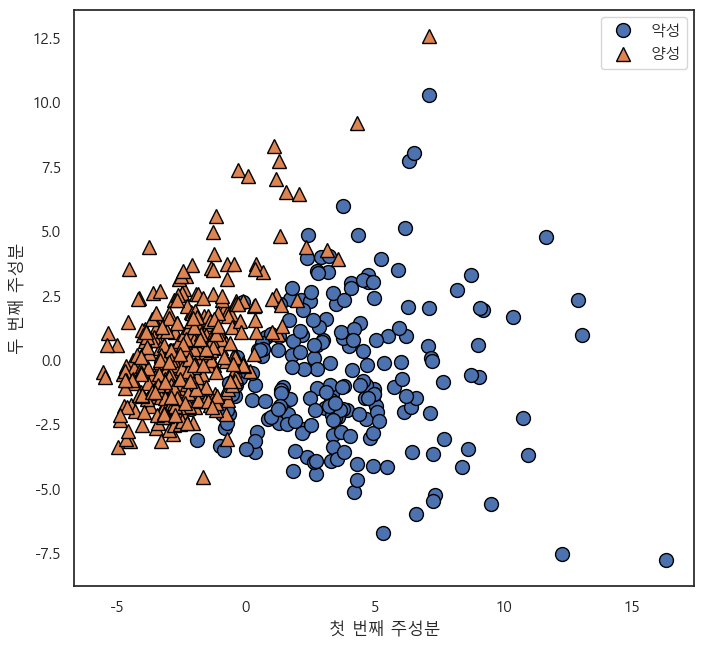

In [8]:
# 맨 처음 두 개의 주성분을 시각화
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer['target'])
plt.legend(["악성", "양성"], loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("첫 번째 주성분")
plt.ylabel("두 번째 주성분")
plt.show()

- 단순히 데이터에 있는 상관관계만을 고려하여 주성분을 찾고, 시각화한 결과이다.
- 시각화해보니 두 타겟값이 2차원 공간에서는 꽤 분리가 잘 되는 것을 확인할 수 있다.
- 그러나, 주성분은 원본 데이터에 있는 여러 특성들이 조합된 형태이기 때문에 해석이 쉽지 않다.

In [9]:
print(f"PCA 주성분의 형태: {pca.components_.shape}")
print(f"PCA 주성분: {pca.components_}")

PCA 주성분의 형태: (2, 30)
PCA 주성분: [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


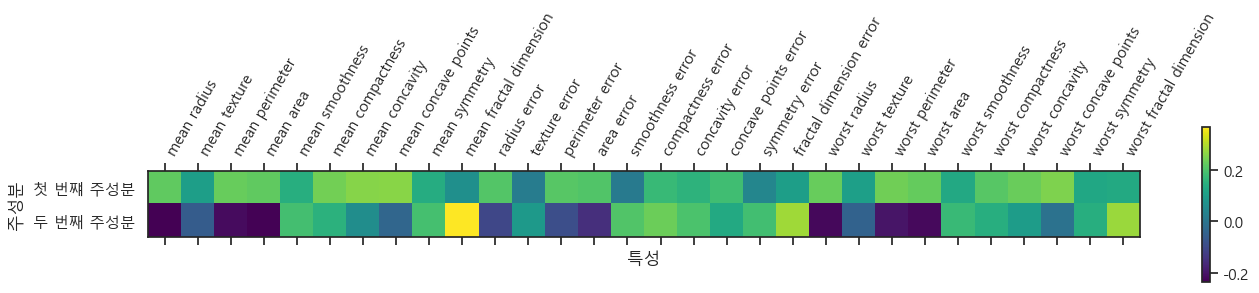

In [10]:
# 히트맵으로 시각화
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["첫 번쨰 주성분", "두 번째 주성분"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left')
plt.xlabel("특성")
plt.ylabel("주성분")
plt.show()

- 첫 번째 주성분의 모든 특성은 부호가 같다.
    - 모든 특성 사이에 공통의 상호관계가 있다는 뜻이다.
    - 따라서 한 특성의 값이 커지면 다른 값들도 같이 높아질 우려가 있다.
- 두 번째 주성분은 부호가 섞여있다.
    - 각 특성별로 상호관계에 차이가 있으나, 부호 별로 비슷한 상호관계를 나타낸다는 뜻이다.
- 두 주성분 모두 모든 특성의 상호관계를 포함하고 있기 때문에 해석이 어렵다.